## Problem Statement:

 People coming from various states to Bangalore look for different kinds of housing all over the city. The dataset gives various details about the types of housings people coming to Bangalore generally look for,along with their pricings.I have built various regression models,evaluated the performance of  each of the models and finally found the best regression model so as to predict the price of the housing the people are looking for. 

#### Independent variables:

area_type: Type of area surrounding the housing
    
availability: The availabilty status of the housing
    
location: Where in Bangalore is the housing located
    
size: Size of the house 
    
society : Society name  of the respective house
    
total_sqft: Total square feet of the house
    
bath: Number of bathrooms in the house
    
balcony: Number of balconies in the house

#### Dependent/Target variable:

price: Price of the house.

## Importing Required Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from warnings import filterwarnings
filterwarnings("ignore")
from category_encoders import TargetEncoder 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,StackingRegressor
from xgboost import XGBRegressor

## Reading CSV File:

In [2]:
df_house=pd.read_csv("Train.csv")
# Top 5 rows
df_house.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00


In [3]:
# Last 5 rows
df_house.tail(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689.0,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550.0,1.0,1.0,17.0


In [4]:
df_house.shape

(13320, 9)

###### Inference: 13320 rows and 9 columns are present in the dataset.

## Null Value Treatment:

In [5]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  float64
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(4), object(5)
memory usage: 936.7+ KB


###### Inference: Using the info() function , we can see that few columns have null values in them . Also we can inspect if the datatypes of each variables are correct.

In [6]:
df_house.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
df_house.drop(columns=['society'],axis=1,inplace=True)

###### Inference: Since 'Society' variable has alot of null values in them and also the columns 'Location' has scome association with it , 'Society' variable has  been dropped.

In [8]:
df_house['size'].mode()

0    2 BHK
dtype: object

In [9]:
df_house['size'].fillna("2 BHK",inplace=True)

In [10]:
df_house['location'].mode()

0    Whitefield
dtype: object

In [11]:
df_house['location'].fillna("Whitefield",inplace=True)

###### Inference: Null values in  'Size'  & 'Location' variable  has been replaced by it's respective mode since it is a categorical variables. 

In [12]:
df_house['bath'].fillna(df_house['bath'].mean(),inplace=True)

In [13]:
df_house['balcony'].fillna(df_house['balcony'].mean(),inplace=True)

###### Inference: Null values in variables 'Bath' & 'Balcony' have been replaced by their respective mean values .

In [14]:
df_house.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

###### Inference: Null values have been treated.

## Checking for Outliers:

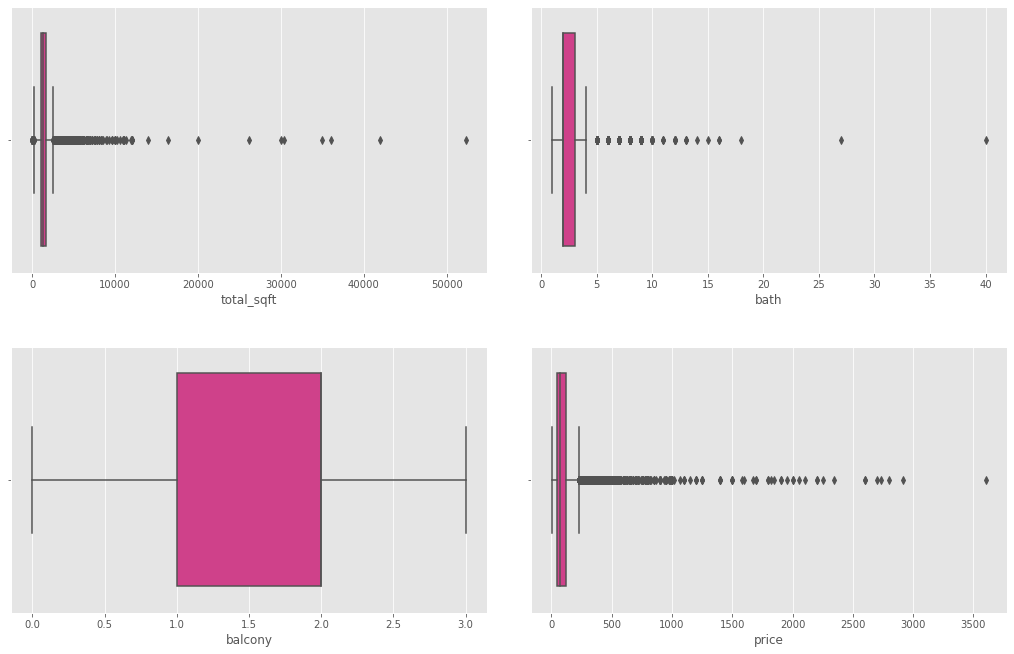

In [15]:
# Checking the numerical independent variables for outliers
df_num=df_house.select_dtypes(np.number)
fig,ax=plt.subplots(2,2,figsize=(15,10))
for i,ax in zip(df_num.columns,ax.flatten()):
    x=sns.boxplot(df_num[i],ax=ax,palette='Dark2_r')
plt.tight_layout(pad=4)

###### Inference: As per the boxplots above the ' Total_Sqft' ,'Bath' and 'Price' variables has outliers in them.

## Exploratory Data Analysis:

In [16]:
df_cat=df_house.select_dtypes(np.object)
df_cat.head(2)

,area_type,availability,location,size
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom


In [17]:
df_cat.describe()

,area_type,availability,location,size
count,13320,13320,13320,13320
unique,4,81,1305,31
top,Super built-up Area,Ready To Move,Whitefield,2 BHK
freq,8790,10581,541,5215


###### Inference: The count of each variable is given. The classes of each categorical variable is given along with the class with the highest frequency.

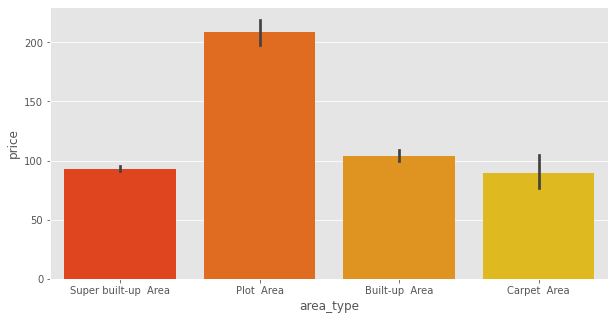

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(df_house['area_type'],df_house['price'],palette='autumn')
plt.show()

###### Inference: The area type 'Plot Area' has the highest price as per the bar plot above.

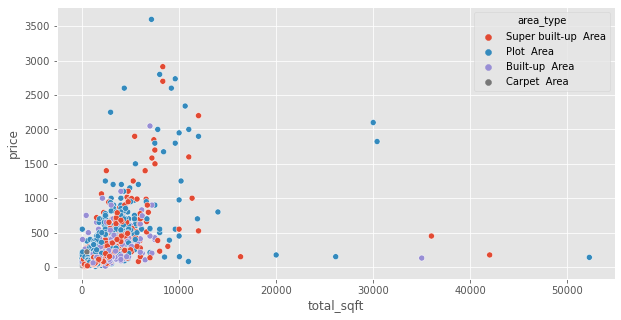

In [19]:
plt.figure(figsize=(10,5))
sns.scatterplot(df_house['total_sqft'],df_house['price'],hue=df_house['area_type'])
plt.show()

###### Inference: As per the scatter plot above  different the area types with higher prices have a lower total square feet and the ones with higher total square feet have lower prices.

## Encoding Categorical Variables :

In [20]:
# Encoding categorical data first by target encoding them 
enc=TargetEncoder()
data_encode=enc.fit_transform(df_cat,df_house.iloc[:,[-1]])
data_encode.head(2)

,area_type,availability,location,size
0,92.971757,111.379351,48.316667,57.555944
1,208.495486,115.179137,115.015882,265.067379


In [21]:
# Encoding the target encoded variables using Label Encoder so the it is encoded in an ascending order
data_encoded=data_encode.apply(LabelEncoder().fit_transform)
data_encoded.head(2)

,area_type,availability,location,size
0,1,45,48,2
1,3,48,484,18


## Scaling Numerical Variables:

In [22]:
df_num1=df_num.drop(columns=['price'])
df_num1.head(2)

,total_sqft,bath,balcony
0,1056.0,2.0,1.0
1,2600.0,5.0,3.0


In [23]:
# Scaling numerical variables using MinMaxScaler
sc=MinMaxScaler()
data_scaled=pd.DataFrame(sc.fit_transform(df_num1),columns=df_num1.columns)
data_scaled.head(2)

,total_sqft,bath,balcony
0,0.020183,0.025641,0.333333
1,0.049722,0.102564,1.000000


In [24]:
data_price=pd.concat([data_encoded,data_scaled,df_house.iloc[:,[-1]]],axis=1)
data_price.head(2)

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,1,45,48,2,0.020183,0.025641,0.333333,39.07
1,3,48,484,18,0.049722,0.102564,1.000000,120.00


## Splitting data into Train and Test :

In [25]:
#Independent variables
X=data_price.drop(columns=['price'])

#Dependent variable
y=data_price['price']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)
print("X train shape:",X_train.shape)
print("X test shape:",X_test.shape)
print("Y train shape:",y_train.shape)
print("Y test shape:",y_test.shape)

X train shape: (9324, 7)
X test shape: (3996, 7)
Y train shape: (9324,)
Y test shape: (3996,)


## Defining Functions to obtain scores of model :

In [26]:
def get_train_score(model):
    r2=round(model.score(X_train,y_train),4)
    N=X_train.shape[0]
    p=X_train.shape[1]
    adj_r2=round(1 - ((1-r2)*(N-1)/(N-p-1)),4)
    return ([r2,adj_r2])

In [27]:
def get_test_rmse(model):
    y_test_pred=model.predict(X_test)
    mse_test=mean_squared_error(y_test,y_test_pred)
    test_rmse=round(np.sqrt(mse_test),4)
    return(test_rmse)

In [28]:
score_card=pd.DataFrame(columns=["Model Name","R2","Adjusted R2","Alpha when required","Test Rmse"])
def update_score_card(algo_name,model,alpha='-'):
    global score_card
    
    score_card=score_card.append({"Model Name":algo_name,"R2":get_train_score(model)[0],
                                  "Adjusted R2":get_train_score(model)[1],
                                 "Alpha when required":alpha,"Test Rmse":get_test_rmse(model)},ignore_index=True)
    return score_card

## Linear Regression (Base Model):

In [29]:
lin_reg1=LinearRegression()
lin_reg1.fit(X_train,y_train)

LinearRegression()

In [30]:
update_score_card("Linear Regression (Base Model)",lin_reg1)

,Model Name,R2,Adjusted R2,Alpha when required,Test Rmse
0,Linear Regression (Base Model),0.5316,0.5312,-,140.1678


###### Inference: The model score obtained after training the model using 70% data is 53% , adjusted R2 gives only slight change . The rmse is calculated from the remaining 30% of the data which is 140.1678.

## Improving the previous model :

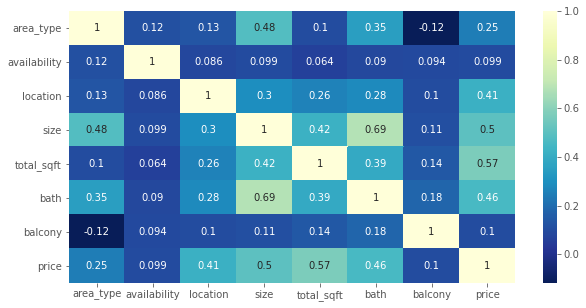

In [31]:
plt.figure(figsize=(10,5))
sns.heatmap(data_price.corr(),annot=True,cmap='YlGnBu_r')
plt.show()

###### Inference: As per the heatmap above, the variables 'location','size' ,'total_sqft' and 'bath' have a strong correlation with the target variable 'price'

## Building a model using the above mentioned features :

In [32]:
X_train=X_train.iloc[:,[2,3,4,5]]
X_test=X_test.iloc[:,[2,3,4,5]]

In [33]:
lin_reg2=LinearRegression()
lin_reg2.fit(X_train,y_train)

LinearRegression()

In [34]:
update_score_card("Linear Regression (Correlated Features)",lin_reg2)

,Model Name,R2,Adjusted R2,Alpha when required,Test Rmse
0,Linear Regression (Base Model),0.5316,0.5312,-,140.1678
1,Linear Regression (Correlated Features),0.5237,0.5235,-,138.9395


###### Inference : On using just the features with high correlation with the target variable we get a reduction in both R2 and Adjusted R2 but also a slight reduction in Rmse.

## Feature Selection using Recursive Feature Elimination:

In [35]:
X=data_price.drop(columns=['price'])
y=data_price['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)
lin_reg3=LinearRegression()
rfe=RFE(estimator=lin_reg3,n_features_to_select=5)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [36]:
# RFE returns the ranking of each feature.
sig_feat=pd.Series(rfe.ranking_,index=X_train.columns)
sig_feat

area_type       1
availability    2
location        3
size            1
total_sqft      1
bath            1
balcony         1
dtype: int32

In [37]:
#Features with ranking 1 are selected for model training
feat_1=sig_feat[sig_feat==1].index
feat_1

Index(['area_type', 'size', 'total_sqft', 'bath', 'balcony'], dtype='object')

In [38]:
X_train=X_train.loc[:,feat_1]
X_test=X_test.loc[:,feat_1]
lin_reg4=LinearRegression()
lin_reg4.fit(X_train,y_train)

LinearRegression()

In [39]:
update_score_card("Linear Regression (RFE)",lin_reg4)

,Model Name,R2,Adjusted R2,Alpha when required,Test Rmse
0,Linear Regression (Base Model),0.5316,0.5312,-,140.1678
1,Linear Regression (Correlated Features),0.5237,0.5235,-,138.9395
2,Linear Regression (RFE),0.4916,0.4913,-,146.6281


###### Inference: The R2 and Adjusted R2 have reduced even more and the Rmse has increased alot.

## Supervised Vector Regression (Base Model):

In [40]:
X=data_price.drop(columns=['price'])
y=data_price['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)
svm=SVR()
svm.fit(X_train,y_train)

SVR()

In [41]:
update_score_card("SVR (Base Model)",svm)

,Model Name,R2,Adjusted R2,Alpha when required,Test Rmse
0,Linear Regression (Base Model),0.5316,0.5312,-,140.1678
1,Linear Regression (Correlated Features),0.5237,0.5235,-,138.9395
2,Linear Regression (RFE),0.4916,0.4913,-,146.6281
3,SVR (Base Model),0.1543,0.1537,-,157.0207


###### Inference: The scores obtained are the lowest and the rmse is the highest.

## Tuning Hyperparameters of Supervised Vector Regression:

best_param=[{"kernel":['linear','rbf', 'sigmoid'],"max_iter":range(70,100)}]

svm=SVR()

gsearch=GridSearchCV(estimator=svm,param_grid=best_param)

gsearch.fit(X_train,y_train)

gsearch.best_params_

In [42]:
best_params={'kernel': 'sigmoid', 'max_iter': 1000}

In [43]:
# Using the parameters obtained
svm1=SVR(**best_params)
svm1.fit(X_train,y_train)

SVR(kernel='sigmoid', max_iter=1000)

In [44]:
update_score_card("SVR (Grid Search)",svm1)

,Model Name,R2,Adjusted R2,Alpha when required,Test Rmse
0,Linear Regression (Base Model),0.5316,0.5312,-,140.1678
1,Linear Regression (Correlated Features),0.5237,0.5235,-,138.9395
2,Linear Regression (RFE),0.4916,0.4913,-,146.6281
3,SVR (Base Model),0.1543,0.1537,-,157.0207
4,SVR (Grid Search),-0.4886,-0.4897,-,196.0099


###### Inference: The scores obtained are the -ve and the rmse is the highest. This model is not suitable.

## Decision Tree Regression (Base Model):

In [45]:
tree1=DecisionTreeRegressor(random_state=10)
tree1.fit(X_train,y_train)

DecisionTreeRegressor(random_state=10)

In [46]:
update_score_card("Decision Tree Regressor(Base Model)",tree1)

,Model Name,R2,Adjusted R2,Alpha when required,Test Rmse
0,Linear Regression (Base Model),0.5316,0.5312,-,140.1678
1,Linear Regression (Correlated Features),0.5237,0.5235,-,138.9395
2,Linear Regression (RFE),0.4916,0.4913,-,146.6281
3,SVR (Base Model),0.1543,0.1537,-,157.0207
4,SVR (Grid Search),-0.4886,-0.4897,-,196.0099
5,Decision Tree Regressor(Base Model),0.9985,0.9985,-,90.3204


###### Inference : The R2 and Adjusted R2 are 99% .However decision tree is highly prone to over-fitting and so tuning of hyperparameters is necessary.

## Tuning Hyperparameters of Decision Tree Regression :

best_param=[{"max_depth":range(1,20),"max_features":range(1,8),"max_leaf_nodes":range(2,10)}]

tree2=DecisionTreeRegressor(random_state=10)

rsearch=RandomizedSearchCV(estimator=tree2,param_distributions=best_param)

rsearch.fit(X_train,y_train)

rsearch.best_params_

In [47]:
# Using the best parameters above for model building
best_param={'max_leaf_nodes': 6, 'max_features': 6, 'max_depth': 10}

In [48]:
tree2=DecisionTreeRegressor(random_state=10,**best_param)
tree2.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, max_features=6, max_leaf_nodes=6,
                      random_state=10)

In [49]:
update_score_card("Decision Tree Regressor(Randomized Search)",tree2)

,Model Name,R2,Adjusted R2,Alpha when required,Test Rmse
0,Linear Regression (Base Model),0.5316,0.5312,-,140.1678
1,Linear Regression (Correlated Features),0.5237,0.5235,-,138.9395
2,Linear Regression (RFE),0.4916,0.4913,-,146.6281
3,SVR (Base Model),0.1543,0.1537,-,157.0207
4,SVR (Grid Search),-0.4886,-0.4897,-,196.0099
5,Decision Tree Regressor(Base Model),0.9985,0.9985,-,90.3204
6,Decision Tree Regressor(Randomized Search),0.6241,0.6238,-,97.3690


###### Inference: The model gives an R2 and Adjusted R2 of 62% and a rmse of 97.36.

#### Applying Regularization, Bagging & Boosting Techniques to further reduce the Rmse score 

## Regularizarion using Ridge Regression :

In [50]:
ridge=Ridge(random_state=10)
ridge.fit(X_train,y_train)

Ridge(random_state=10)

In [51]:
update_score_card("Ridge Regression",ridge,alpha=1)

,Model Name,R2,Adjusted R2,Alpha when required,Test Rmse
0,Linear Regression (Base Model),0.5316,0.5312,-,140.1678
1,Linear Regression (Correlated Features),0.5237,0.5235,-,138.9395
2,Linear Regression (RFE),0.4916,0.4913,-,146.6281
3,SVR (Base Model),0.1543,0.1537,-,157.0207
4,SVR (Grid Search),-0.4886,-0.4897,-,196.0099
5,Decision Tree Regressor(Base Model),0.9985,0.9985,-,90.3204
6,Decision Tree Regressor(Randomized Search),0.6241,0.6238,-,97.3690
7,Ridge Regression,0.5172,0.5168,1,131.5150


######  Inference: The scores obtained are not the best . Further tuning the hyperparameters.

## Tuning Hyperparameters of Ridge Regression :

tuned_param=[{"alpha": [.001,.002,.003,.004,.005,.006,.007,.008,.009,.01,.02,.05,.1,.2,.5,1,2,5,10]}]

ridge2=Ridge(random_state=10)

gsearch=GridSearchCV(estimator=ridge2,param_grid=tuned_param)

gsearch.fit(X_train,y_train)

gsearch.best_params_

In [52]:
# Using the best parameter obtained.
best_params={'alpha': 0.2}

In [53]:
ridge2=Ridge(alpha=0.2,random_state=10)
ridge2.fit(X_train,y_train)

Ridge(alpha=0.2, random_state=10)

In [54]:
update_score_card("Ridge Regression (Grid Search)",ridge2,alpha=0.2)

,Model Name,R2,Adjusted R2,Alpha when required,Test Rmse
0,Linear Regression (Base Model),0.5316,0.5312,-,140.1678
1,Linear Regression (Correlated Features),0.5237,0.5235,-,138.9395
2,Linear Regression (RFE),0.4916,0.4913,-,146.6281
3,SVR (Base Model),0.1543,0.1537,-,157.0207
4,SVR (Grid Search),-0.4886,-0.4897,-,196.0099
5,Decision Tree Regressor(Base Model),0.9985,0.9985,-,90.3204
6,Decision Tree Regressor(Randomized Search),0.6241,0.6238,-,97.3690
7,Ridge Regression,0.5172,0.5168,1,131.5150
8,Ridge Regression (Grid Search),0.5306,0.5302,0.2,137.3025


###### Inference: The scores have improved from the last model but not enough.

## Random Forest Regression (Base Model) :

In [55]:
rf=RandomForestRegressor(random_state=10)
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=10)

In [56]:
update_score_card("Random Forest Regressor(Base Model)",rf)

,Model Name,R2,Adjusted R2,Alpha when required,Test Rmse
0,Linear Regression (Base Model),0.5316,0.5312,-,140.1678
1,Linear Regression (Correlated Features),0.5237,0.5235,-,138.9395
2,Linear Regression (RFE),0.4916,0.4913,-,146.6281
3,SVR (Base Model),0.1543,0.1537,-,157.0207
4,SVR (Grid Search),-0.4886,-0.4897,-,196.0099
5,Decision Tree Regressor(Base Model),0.9985,0.9985,-,90.3204
6,Decision Tree Regressor(Randomized Search),0.6241,0.6238,-,97.3690
7,Ridge Regression,0.5172,0.5168,1,131.5150
8,Ridge Regression (Grid Search),0.5306,0.5302,0.2,137.3025
9,Random Forest Regressor(Base Model),0.9603,0.9603,-,71.3185


###### Inference: The scores obtained are very good .Also the rmse value obtained is the lowest . In order to eliminate the doubt of overfitting, the hyperparameters will be tuned further.

## Tuning Hyperparameters of Random Forest Regressor:

tuned_param=[{"n_estimators":range(100,200),"max_depth":range(5,11),"max_features":range(2,11),"max_leaf_nodes":range(5,30)}]

rf2=RandomForestRegressor(random_state=10)

rsearch=RandomizedSearchCV(estimator=rf2,param_distributions=tuned_param,cv=3,random_state=10)

rsearch.fit(X_train,y_train)

rsearch.best_params_

In [57]:
#Using the parameters obtained.
best_param={'n_estimators': 172, 'max_leaf_nodes': 23, 'max_features': 5, 'max_depth': 5}
rf2=RandomForestRegressor(random_state=10,**best_param)
rf2.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, max_features=5, max_leaf_nodes=23,
                      n_estimators=172, random_state=10)

In [58]:
update_score_card("Random Forest Regressor(Randomized Search)",rf2)

,Model Name,R2,Adjusted R2,Alpha when required,Test Rmse
0,Linear Regression (Base Model),0.5316,0.5312,-,140.1678
1,Linear Regression (Correlated Features),0.5237,0.5235,-,138.9395
2,Linear Regression (RFE),0.4916,0.4913,-,146.6281
3,SVR (Base Model),0.1543,0.1537,-,157.0207
4,SVR (Grid Search),-0.4886,-0.4897,-,196.0099
5,Decision Tree Regressor(Base Model),0.9985,0.9985,-,90.3204
6,Decision Tree Regressor(Randomized Search),0.6241,0.6238,-,97.3690
7,Ridge Regression,0.5172,0.5168,1,131.5150
8,Ridge Regression (Grid Search),0.5306,0.5302,0.2,137.3025
9,Random Forest Regressor(Base Model),0.9603,0.9603,-,71.3185


###### Inference: The scores dropped down after tuning hyperparameters. Also the rmse increased. This means the random forest  model works better before tuning hyper parameters.

## Gradient Boosting (Base Model) :

In [61]:
gboost=GradientBoostingRegressor(random_state=10)
gboost.fit(X_train,y_train)

GradientBoostingRegressor(random_state=10)

In [62]:
update_score_card("Gradient Boosting Regressor (Base Model) :",gboost)

,Model Name,R2,Adjusted R2,Alpha when required,Test Rmse
0,Linear Regression (Base Model),0.5316,0.5312,-,140.1678
1,Linear Regression (Correlated Features),0.5237,0.5235,-,138.9395
2,Linear Regression (RFE),0.4916,0.4913,-,146.6281
3,SVR (Base Model),0.1543,0.1537,-,157.0207
4,SVR (Grid Search),-0.4886,-0.4897,-,196.0099
5,Decision Tree Regressor(Base Model),0.9985,0.9985,-,90.3204
6,Decision Tree Regressor(Randomized Search),0.6241,0.6238,-,97.3690
7,Ridge Regression,0.5172,0.5168,1,131.5150
8,Ridge Regression (Grid Search),0.5306,0.5302,0.2,137.3025
9,Random Forest Regressor(Base Model),0.9603,0.9603,-,71.3185


###### Inference : The rmse remains low but the scores have reduced in comparison with the Random Forest Regressor(Base Model). 

## Tuning Hyperparameters of Gradient Boost Regressor :

tuned_param=[{"learning_rate": [.001,.002,.003,.004,.005,.006,.007,.008,.009,.01,.02,.05,.1,.2,.5,1,2,5,10],
    "n_estimators":range(50,200),"max_depth":range(5,11),"max_features":range(2,11),"max_leaf_nodes":range(5,30)}]

gboost2=GradientBoostingRegressor(random_state=10)

rsearch=RandomizedSearchCV(estimator=gboost2,param_distributions=tuned_param,random_state=10,cv=3)

rsearch.fit(X_train,y_train)

rsearch.best_params_

In [65]:
#Using the parameters obtained.
best_param={'n_estimators': 193,
 'max_leaf_nodes': 29,
 'max_features': 5,
 'max_depth': 7,
 'learning_rate': 0.2}
gboost2=GradientBoostingRegressor(random_state=10,**best_param)
gboost2.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=7, max_features=5,
                          max_leaf_nodes=29, n_estimators=193, random_state=10)

In [66]:
update_score_card("Gradient Boosting Regressor (Randomized Search) :",gboost2)

,Model Name,R2,Adjusted R2,Alpha when required,Test Rmse
0,Linear Regression (Base Model),0.5316,0.5312,-,140.1678
1,Linear Regression (Correlated Features),0.5237,0.5235,-,138.9395
2,Linear Regression (RFE),0.4916,0.4913,-,146.6281
3,SVR (Base Model),0.1543,0.1537,-,157.0207
4,SVR (Grid Search),-0.4886,-0.4897,-,196.0099
5,Decision Tree Regressor(Base Model),0.9985,0.9985,-,90.3204
6,Decision Tree Regressor(Randomized Search),0.6241,0.6238,-,97.3690
7,Ridge Regression,0.5172,0.5168,1,131.5150
8,Ridge Regression (Grid Search),0.5306,0.5302,0.2,137.3025
9,Random Forest Regressor(Base Model),0.9603,0.9603,-,71.3185


###### After tuning hyperparameters the scores have increased but the rmse has  slightly increased too ,in comparison with Random Forest Regressor(Base Model).

## XG Boost Regressor (Base Model) :

In [68]:
xgb1=XGBRegressor(random_state=10)
xgb1.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=10,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [69]:
update_score_card("XGBoost Regressor(Base Model) :",xgb1)

,Model Name,R2,Adjusted R2,Alpha when required,Test Rmse
0,Linear Regression (Base Model),0.5316,0.5312,-,140.1678
1,Linear Regression (Correlated Features),0.5237,0.5235,-,138.9395
2,Linear Regression (RFE),0.4916,0.4913,-,146.6281
3,SVR (Base Model),0.1543,0.1537,-,157.0207
4,SVR (Grid Search),-0.4886,-0.4897,-,196.0099
5,Decision Tree Regressor(Base Model),0.9985,0.9985,-,90.3204
6,Decision Tree Regressor(Randomized Search),0.6241,0.6238,-,97.3690
7,Ridge Regression,0.5172,0.5168,1,131.5150
8,Ridge Regression (Grid Search),0.5306,0.5302,0.2,137.3025
9,Random Forest Regressor(Base Model),0.9603,0.9603,-,71.3185


###### Inference: The scores obtained are good .However the rmse value has increased slightly.

## Tuning Hyperparameters of  XGBoost Regressor :

tuned_param=[{"n_estimators":range(50,200),"learning_rate":[.001,.002,.003,.004,.005,.006,.007,.008,.009,.01,.02,.05,.1,.2,.5,1,2,5,10],
             "max_depth":range(5,11),"gamma":range(0,11)}]
             
xgb2=XGBRegressor(random_state=10)

rsearch=RandomizedSearchCV(estimator=xgb2,param_distributions=tuned_param,random_state=10,cv=3)

rsearch.fit(X_train,y_train)

rsearch.best_params_

In [73]:
#Using the parameters obtained.
best_params={'n_estimators': 135, 'max_depth': 6, 'learning_rate': 0.02, 'gamma': 5}
xgb2=XGBRegressor(random_state=10,**best_params)
xgb2.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=5, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.02, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=135, n_jobs=8, num_parallel_tree=1, random_state=10,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [74]:
update_score_card("XGBoost Regressor(Randomized Search) :",xgb2)

,Model Name,R2,Adjusted R2,Alpha when required,Test Rmse
0,Linear Regression (Base Model),0.5316,0.5312,-,140.1678
1,Linear Regression (Correlated Features),0.5237,0.5235,-,138.9395
2,Linear Regression (RFE),0.4916,0.4913,-,146.6281
3,SVR (Base Model),0.1543,0.1537,-,157.0207
4,SVR (Grid Search),-0.4886,-0.4897,-,196.0099
5,Decision Tree Regressor(Base Model),0.9985,0.9985,-,90.3204
6,Decision Tree Regressor(Randomized Search),0.6241,0.6238,-,97.3690
7,Ridge Regression,0.5172,0.5168,1,131.5150
8,Ridge Regression (Grid Search),0.5306,0.5302,0.2,137.3025
9,Random Forest Regressor(Base Model),0.9603,0.9603,-,71.3185


###### Inference: After tuning hyperparameters the scores have decreased and rmse has increased.

## Conclusion :

In [78]:
score_card.style.highlight_min(['Test Rmse'],color='lightgreen')

,Model Name,R2,Adjusted R2,Alpha when required,Test Rmse
0,Linear Regression (Base Model),0.531600,0.531200,-,140.167800
1,Linear Regression (Correlated Features),0.523700,0.523500,-,138.939500
2,Linear Regression (RFE),0.491600,0.491300,-,146.628100
3,SVR (Base Model),0.154300,0.153700,-,157.020700
4,SVR (Grid Search),-0.488600,-0.489700,-,196.009900
5,Decision Tree Regressor(Base Model),0.998500,0.998500,-,90.320400
6,Decision Tree Regressor(Randomized Search),0.624100,0.623800,-,97.369000
7,Ridge Regression,0.517200,0.516800,1,131.515000
8,Ridge Regression (Grid Search),0.530600,0.530200,0.200000,137.302500
9,Random Forest Regressor(Base Model),0.960300,0.960300,-,71.318500


• The model "Random Forest Regressor(Base Model)" has the lowest test rmse value as compared to the other models.

• The model has R2 score and Adjusted R2 score of 96% which depicts lowest bias and since it gives the lowest test rmse it also depicts lowest variance as compared to the performance of other models.

• The problem of overfitting has been eliminated.

• Therefore the model "Random Forest Regressor(Base Model)"  is the best fitted model and can be further used to predict the prices of houses in Bangalore.

